<a href="https://meetup-python-grenoble.github.io" target="_blank"><img src="logo.png" width=500px/></a>

# 🐍 <a href="https://meetup-python-grenoble.github.io" target="_blank">Meetup Python Grenoble</a>
# 💻 Atelier "Python Mapping for Good"
## 🗓️ Jeudi 28 mars 2024 - 19h - <a href="https://turbine.coop" target="_blank">La Turbine</a>
## Jessica Pic | Elise Pupier | Pierre-Loïc Bayart

## ⚙️ Installation et import des bibliothèques

In [18]:
%pip install -q nbformat plotly
%pip install -q folium
%pip install -q mapclassify

In [19]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import plotly.express as px
import pyodide_http

pyodide_http.patch_all()

## 📚 Liens vers la documentation des bibliothèques

- <a href="https://geopandas.org/en/stable/" target="_blank">GeoPandas</a>
- <a href="https://matplotlib.org" target="_blank">Matplotlib</a>
- <a href="https://python-visualization.github.io/folium/latest/" target="_blank">Folium</a>
- <a href="https://plotly.com/python/" target="_blank">Plotly</a>

## 🗺️ Récupération de données GeoJSON

Le projet Github france-geojson propose au format GeoJSON les cartes des **régions, départements, arrondissements, cantons et communes de France (métropole et départements d'outre-mer)** à partir des données publiées par l'<a href="https://www.ign.fr" target="_blank">IGN</a> et l'<a href="https://www.insee.fr/fr/accueil" target="_blank">INSEE</a>. Lien vers le site : https://france-geojson.gregoiredavid.fr

- Récupérer l'url du fichier **GeoJSON** de l'**isère** sur le site france-geojson
- Avec <a href="https://geopandas.org/en/stable/" target="_blank">GeoPandas</a>, insérer les données dans un **GeoDataframe** (à l'aide de la fonction <a href="https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html" target="_blank">geopandas.read_file()</a>)
- Afficher ces données sur une **carte** (avec Matplotlib ou Folium) avec **toutes bonnes pratiques de cartographie** (à l'aide de la méthode <a href="https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html" target="_blank">geopandas.GeoDataFrame.plot()</a> ou de la méthode <a href="https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html" target="_blank">geopandas.GeoDataFrame.explore()</a> )

In [20]:
gdf = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/departements/38-isere/departement-38-isere.geojson")
gdf

,code,nom,geometry
0,38,Isère,"POLYGON ((5.62374 45.61327, 5.62302 45.60428, ..."


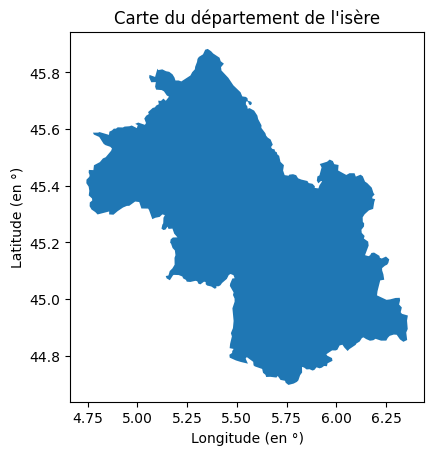

In [32]:
gdf.plot()
plt.title("Carte du département de l'isère")
plt.ylabel("Latitude (en °)")
plt.xlabel("Longitude (en °)")
plt.show()

In [22]:
gdf.explore()

## 🌍 Choix du système de coordonnées de référence (CRS)

La propriété <a href="https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.area.html" target="_blank">geopandas.GeoSeries.area</a> permet de récupérer la surface des élèments d'une géométrie.

- Récupérer la **surface du département de l'isère**. Pourquoi cet avertissement ? (aide avec la propiété <a href="https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.crs.html" target="_blank">geopandas.GeoDataFrame.crs</a>)
- Changer de système de coordonnées de référence pour passer en **Web Mercator (EPSG:3857)** grâce à la méthode <a href="https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html" target="_blank">geopandas.GeoDataFrame.to_crs()</a>. Est-ce la bonne valeur de la surface ? Pourquoi ?
- Changer de système de coordonnées de référence pour passer en **RGF93 / Lambert-93 (EPSG:2154)**

In [24]:
gdf.area

<ipython-input-24-cdb4e6e609bd>:1: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




0    0.903121
dtype: float64

In [25]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
gdf_projected = gdf.to_crs("EPSG:3857")
gdf_projected.area

0    1.590113e+10
dtype: float64

In [27]:
gdf_projected.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
gdf_projected = gdf.to_crs("EPSG:2154")
gdf_projected.area

0    7.866308e+09
dtype: float64

In [29]:
gdf_projected.crs

<Derived Projected CRS: EPSG:2154>
Name: RGF93 v1 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Même chose pour l'agglomération de Grenoble